Imports libraries and data

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tolerance = 1e-6

data = pd.read_csv("data.csv")
inputs = data["x"]
actuals = data["y"]
x_max = (int(str(max(inputs)).replace("-", "")[0]) + 1) * (10 ** (len(str(max(inputs)).replace("-", "").split(".")[0]) - 1)) * (-1 if max(inputs) < 0 else 1)
x_min = (int(str(min(inputs)).replace("-", "")[0]) + (1 if min(inputs) < 0 else -1)) * (10 ** (len(str(min(inputs)).replace("-", "").split(".")[0]) - 1)) * (-1 if min(inputs) < 0 else 1)
y_max = (int(str(max(actuals)).replace("-", "")[0]) + 1) * (10 ** (len(str(max(actuals)).replace("-", "").split(".")[0]) - 1)) * (-1 if max(actuals) < 0 else 1)
y_min = (int(str(min(actuals)).replace("-", "")[0]) + (1 if min(actuals) < 0 else -1)) * (10 ** (len(str(min(actuals)).replace("-", "").split(".")[0]) - 1)) * (-1 if min(actuals) < 0 else 1)

Produces a linear regression model from data

In [214]:
def linear_regression_model(data):
    m = 1
    b = 0
    def funct(x):
        return x * m + b
    learning_rate = 0.001 / abs(max(inputs))
    for iter in range(100_000):
        count = 0
        for i in range(len(inputs)):
            error = actuals[i] - funct(inputs[i])
            if error < tolerance and error > -1 * tolerance:
                count += 1
            m += learning_rate * inputs[i] * error
            b += learning_rate * error
        if count == len(inputs):
            break
    print(f"Function: {m}x + {b}")
    return [m,b]

Graphs the data and line of best fit

Function: 99.99999984790522x + -6.924851151674518e-07


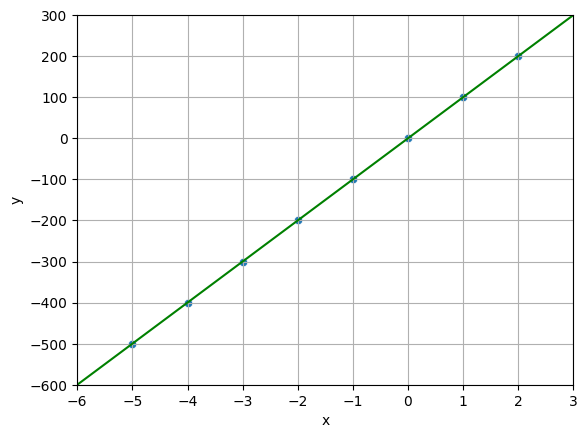

In [215]:
terms = linear_regression_model(data)
m = terms[0]
b = terms[1]

x = np.linspace(x_min, x_max, 100)
y = m * x + b

line_data = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(data=line_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()

Produces a quadratic regression model

In [220]:
def quadratic_regression_model(data):
    a = 1
    b = 0
    c = 0

    def func(x):
        return a * (x ** 2) + b * x + c

    learning_rate = 0.001 / abs(max(inputs))
    for iter in range(10_000):
        count = 0
        for i in range(len(inputs)):
            error = actuals[i] - func(inputs[i])
            if error < tolerance and error < -1 * tolerance:
                count += 1
            a += learning_rate * (inputs[i] ** 2) * error
            b += learning_rate * inputs[i] * error
            c += learning_rate * error
        if count == len(inputs):
            break
    print(f"Function {a}x^2 + {b}x + {c}")
    return [a,b,c]

Graphs a quadratic best fit model

Function -4.695555236112666e-10x^2 + 99.99999999941808x + 5.416852702156972e-09


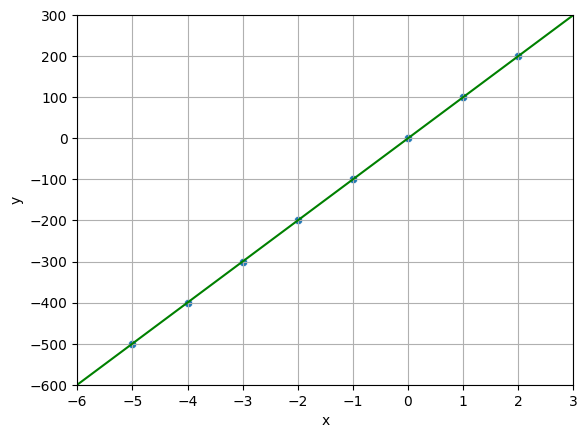

In [221]:
terms = quadratic_regression_model(data)
a = terms[0]
b = terms[1]
c = terms[2]

x = np.linspace(x_min, x_max, 100)
y = a * (x ** 2) + b * x + c

quad_data = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(data=quad_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()

Produces and exponential best fit model

In [222]:
def exponential_regression_model(data):
    a = 1.0
    b = 2.0

    def func(x):
        return a * (b ** x)

    learning_rate = 0.001 / abs(max(inputs))
    for iter in range(100_000):
        count = 0
        for i in range(len(inputs)):
            error = actuals[i] - func(inputs[i])
            if error < tolerance and error > -1 * tolerance:
                count += 1
            a0 = a
            a += (b ** inputs[i]) * learning_rate * error
            b += a0 * ((b ** (inputs[i] - 1)) * inputs[i]) * learning_rate * error
        if count == len(inputs):
            break
    print(f"function: {a} * ({b})^x")
    return [a,b]

Graphs the exponential best fit model

function: 4.032648083466543 * (5.242042519339174)^x


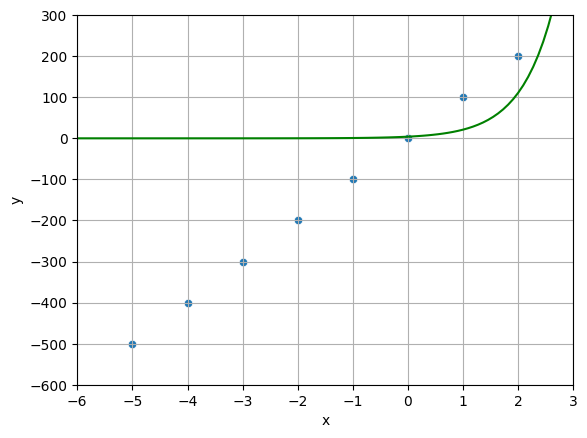

In [223]:
terms = exponential_regression_model(data)
a = terms[0]
b = terms[1]

x = np.linspace(x_min, x_max, 100)
y = a * (b ** x)

exp_data = pd.DataFrame({"x": x, "y": y})
sns.lineplot(data=exp_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()